 <h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lesson-1-:-¿What-are-descriptive-statistics?" data-toc-modified-id="Lesson-1-:-¿What-are-descriptive-statistics?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lesson 1 : ¿What are descriptive statistics?</a></span><ul class="toc-item"><li><span><a href="#Central-tendency-measurements" data-toc-modified-id="Central-tendency-measurements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Central tendency measurements</strong></a></span></li><li><span><a href="#Measures-of-spread-/-dispersion:" data-toc-modified-id="Measures-of-spread-/-dispersion:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong>Measures of spread / dispersion:</strong></a></span></li><li><span><a href="#Meaures-of-frequency" data-toc-modified-id="Meaures-of-frequency-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong>Meaures of frequency</strong></a></span></li><li><span><a href="#Describe-function" data-toc-modified-id="Describe-function-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Describe function</a></span></li></ul></li>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [8]:
data = pd.read_csv('merged_clean_ver2.csv')

In [9]:
data.sample(10) #random 10 rows

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
3213,68120,MI,F,698.000000,340,396,355,436,15577,12.714286,20.0
1244,91453,IL,F,999.000000,411,453,465,496,15934,18.714286,21.0
3,21885,NC,M,1158.437751,401,407,399,413,14014,27.277778,38.0
2334,179876,WA,F,1373.000000,379,539,445,529,19190,7.750000,10.0
1998,47191,AL,F,950.000000,264,295,330,378,20090,4.142857,5.0
2979,158935,CA,F,1781.000000,170,186,252,178,14039,7.230769,5.0
2624,137998,AZ,Female,547.000000,251,292,283,306,10393,17.090909,20.0
2337,22499,SC,F,438.000000,201,257,242,272,8303,15.615385,10.0
2001,30051,GA,F,359.000000,205,260,250,292,9279,9.000000,10.0
3638,139180,NM,F,359.000000,164,186,223,242,7312,8.222222,15.0


#  ¿What are descriptive statistics?

It's a way to describe our data to someone without giving all of the data. For that we use diferent measures:

+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

## **1. Central tendency measurements**



+ **Arithmetic mean (average)** of a variable is found by adding all numbers in the variable and then dividing by the number of values.
+ **Median** is the middle value when a variable is ordered from least to greatest.(If even number is the arithmetic mean between the two in the middle). It is also the Q2 or the 50% of accumulated values.
+ **Mode** is the value/category that occurs most often in a variable.The most frequent.

In [10]:
sample1 = [1,1,2,2,3,4,5,7,8,9]

In [11]:
my_mean = sum(sample1)/len(sample1)
my_mean

4.2

In [12]:
np.mean(sample1) #numpy library

4.2

In [13]:
np.median(sample1)

3.5

Now with pandas and checking the column "median_home_val"

In [14]:
print("Mean: ",data["median_home_val"].mean())

print("Median: ",data["median_home_val"].median())

print("Mode: ",data["median_home_val"].mode()) #mode makes sense for categoricals or discrete

Mean:  1158.437751004007
Median:  803.0
Mode:  0    0.0
Name: median_home_val, dtype: float64


In [15]:
data.describe()

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


What does it mean that mean is higher than median??

<AxesSubplot:>

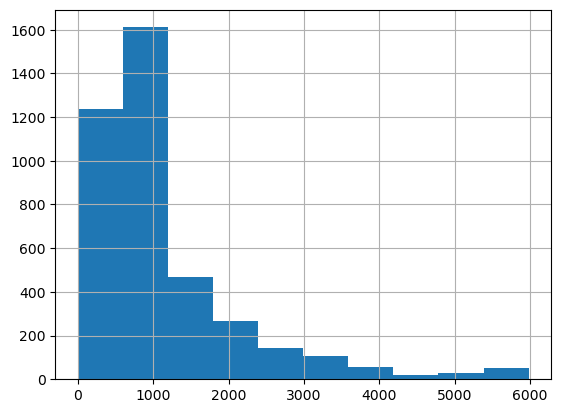

In [16]:
data["median_home_val"].hist()

## **2. Measures of spread / dispersion:**

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

![quartiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

In [17]:
my_range = max(sample1) - min(sample1)
my_range

8

In [18]:
my_range2 = max(data["median_home_val"]) - min (data["median_home_val"])
my_range2

5982.0

**Variance**

In [19]:
np.var(sample1)

7.76

In [20]:
np.var(data["median_home_val"])

1067825.3525074506

**STD**

In [21]:
np.std(sample1)

2.7856776554368237

In [22]:
np.std(data["median_home_val"])

1033.3563531074121

**Quantile**

In [23]:
sample1

[1, 1, 2, 2, 3, 4, 5, 7, 8, 9]

In [24]:
np.quantile(sample1, 0.25)

2.0

In [25]:
np.quantile(sample1, 0.5) #median

3.5

In [26]:
np.quantile(sample1, 0.75)

6.5

In [27]:
np.quantile(sample1, 0) #min value

1

In [28]:
np.quantile(sample1, 1) #max value

9

**Percentile**

In [29]:
np.percentile(sample1, 25)

2.0

In [30]:
np.percentile(sample1,50)

3.5

In [31]:
np.percentile(sample1,75)

6.5

In [32]:
np.percentile(sample1,100)

9.0

In [33]:
np.percentile(sample1, 0)

1.0

## **3. Meaures of frequency**
+ **Frequency:** absolute frequency is a simple count of the number of times a value is observed

In [34]:
sample1

[1, 1, 2, 2, 3, 4, 5, 7, 8, 9]

In [35]:
sample1.count(2)

2

In [36]:
data["state"].value_counts()

CA            751
FL            337
TX            293
IL            247
MI            225
NC            168
WA            153
GA            122
OR            117
WI            110
MO            108
IN            108
California    100
CO             88
AZ             88
SC             85
MN             75
KY             67
AL             59
OK             57
LA             56
TN             52
KS             48
NV             46
IA             44
NM             44
AR             42
NE             33
MS             33
Tennessee      29
MT             24
Cali           24
ID             23
SD             22
HI             21
UT             21
Arizona        17
ND             16
WY             12
AK              6
MD              4
CT              3
AP              3
NJ              2
AA              2
PA              2
NY              1
VA              1
AE              1
VT              1
WV              1
GU              1
Name: state, dtype: int64

## Describe function

In [37]:
data.describe()
# data.describe(include=[np.number])

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


In [38]:
data.describe(include='all')

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993,3993,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
unique,NaN,52,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CA,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,751,2080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,98929.308039,NaN,NaN,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,NaN,NaN,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,NaN,NaN,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,NaN,NaN,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,NaN,NaN,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000


In [39]:
summary = data.describe().T #Transposed dataframe from describe() function.
summary

,count,mean,std,min,25%,50%,75%,max
id,3993.0,98929.308039,58179.839090,12.00000,46153.0000,101432.0,151653.000000,191779.0
median_home_val,3993.0,1158.437751,1033.485773,0.00000,548.0000,803.0,1349.000000,5982.0
median_household_income,3993.0,351.622840,168.488445,0.00000,239.0000,318.0,425.000000,1500.0
ic2,3993.0,400.713248,180.568500,0.00000,284.0000,366.0,478.000000,1500.0
ic3,3993.0,399.876283,164.822741,0.00000,287.0000,365.0,480.000000,1311.0
ic4,3993.0,444.732031,175.004178,0.00000,325.0000,410.0,528.000000,1331.0
ic5,3993.0,16456.413724,9455.318118,0.00000,11136.0000,14356.0,18780.000000,174523.0
avggift,3993.0,11.785117,10.172672,2.26087,7.1875,10.0,14.428571,450.0
target_d,3993.0,15.665036,12.703041,1.00000,10.0000,14.0,20.000000,200.0


**IQR** Interquartile range

*Is the difference between the 75th and 25th percentiles of the data.*

In [40]:
summary['iqr'] = summary['75%'] - summary['25%']
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,3993.0,98929.308039,58179.839090,12.00000,46153.0000,101432.0,151653.000000,191779.0,105500.000000
median_home_val,3993.0,1158.437751,1033.485773,0.00000,548.0000,803.0,1349.000000,5982.0,801.000000
median_household_income,3993.0,351.622840,168.488445,0.00000,239.0000,318.0,425.000000,1500.0,186.000000
ic2,3993.0,400.713248,180.568500,0.00000,284.0000,366.0,478.000000,1500.0,194.000000
ic3,3993.0,399.876283,164.822741,0.00000,287.0000,365.0,480.000000,1311.0,193.000000
ic4,3993.0,444.732031,175.004178,0.00000,325.0000,410.0,528.000000,1331.0,203.000000
ic5,3993.0,16456.413724,9455.318118,0.00000,11136.0000,14356.0,18780.000000,174523.0,7644.000000
avggift,3993.0,11.785117,10.172672,2.26087,7.1875,10.0,14.428571,450.0,7.241071
target_d,3993.0,15.665036,12.703041,1.00000,10.0000,14.0,20.000000,200.0,10.000000


In [41]:
summary = round(summary,2)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
id,3993.0,98929.31,58179.84,12.00,46153.00,101432.0,151653.00,191779.0,105500.00
median_home_val,3993.0,1158.44,1033.49,0.00,548.00,803.0,1349.00,5982.0,801.00
median_household_income,3993.0,351.62,168.49,0.00,239.00,318.0,425.00,1500.0,186.00
ic2,3993.0,400.71,180.57,0.00,284.00,366.0,478.00,1500.0,194.00
ic3,3993.0,399.88,164.82,0.00,287.00,365.0,480.00,1311.0,193.00
ic4,3993.0,444.73,175.00,0.00,325.00,410.0,528.00,1331.0,203.00
ic5,3993.0,16456.41,9455.32,0.00,11136.00,14356.0,18780.00,174523.0,7644.00
avggift,3993.0,11.79,10.17,2.26,7.19,10.0,14.43,450.0,7.24
target_d,3993.0,15.67,12.70,1.00,10.00,14.0,20.00,200.0,10.00
